<a href="https://colab.research.google.com/github/nikhil1029/Nikhil_INFO5502_Spring2022/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
pip install keras

In [4]:
pip install tensorflow

     |████████████████████████████████| 462 kB 18.2 MB/s 


Error score for Root Mean Square  is 75.9549436001661
Score of R2 is  0.9783453724222465


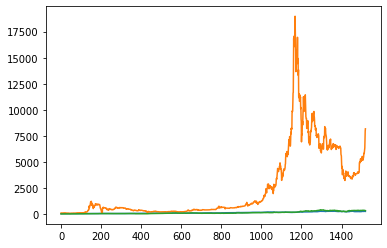

In [10]:
portfolio=pd.read_csv('/content/portfolio_data.csv')

sq = portfolio.drop(['Date', 'AMZN'], asqis = 1)
rt = portfolio['AMZN']
plt.plot(sq)
sqtrain,sqtest,rttrain,rttest = train_test_split(sq, rt, test_size = 0.35, random_state = 0)

logireg = LinearRegression()
logireg.fit(sqtrain, rttrain)

rtpred = logireg.predict(sqtest)
print("Error score for Root Mean Square  is",np.sqrt(mean_squared_error(rttest, rtpred)))
print("Score of R2 is ", r2_score(rttest, rtpred))

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [7]:
mdl = Sequential()
mdl.add(LSTM(50, return_sequences=True, input_shape= (abctrain.shape[1], 1)))
mdl.add(LSTM(50, return_sequences=False))
mdl.add(Dense(50))
mdl.add(Dense(1))

# Compiling the model
mdl.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
mdl.fit(abctrain, eftrain, batch_size=1, epochs=25)

Epoch 1/25
988/988 [==============================] - 9s 5ms/step - loss: 347746.8750
Epoch 2/25
988/988 [==============================] - 5s 5ms/step - loss: 16997.8750
Epoch 3/25
988/988 [==============================] - 5s 5ms/step - loss: 8995.9746
Epoch 4/25
988/988 [==============================] - 5s 5ms/step - loss: 7482.5186
Epoch 5/25
988/988 [==============================] - 5s 5ms/step - loss: 7068.8101
Epoch 6/25
988/988 [==============================] - 5s 5ms/step - loss: 6890.8794
Epoch 7/25
988/988 [==============================] - 5s 5ms/step - loss: 6871.6997
Epoch 8/25
988/988 [==============================] - 5s 5ms/step - loss: 6594.6987
Epoch 9/25
988/988 [==============================] - 5s 5ms/step - loss: 6884.6641
Epoch 10/25
988/988 [==============================] - 5s 5ms/step - loss: 6588.9873
Epoch 11/25
988/988 [==============================] - 5s 5ms/step - loss: 6353.0645
Epoch 12/25
988/988 [==============================] - 5s 5ms/step - lo

In [12]:
from sklearn.ensemble import RandomForestRegressor

sqtrain, sqtest, rttrain, rttest = train_test_split(sq, rt, test_size = 0.3, random_state = 0)
rfreg = RandomForestRegressor(random_state=211)
rfreg.fit(sqtrain, rttrain)

rfregpred = rfreg.predict(sqtest)
print("Score for RandomForestRegressor is  ",np.sqrt(mean_squared_error(rttest, rfregpred)))
print("Score for R2 is ", r2_score(rttest, rfregpred))

Score for RandomForestRegressor is   29.030881296523003
Score for R2 is  0.9968733510365456


In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

design = Sequential()
design.add(LSTM(50, return_sequences=True, input_shape= (sqtrain.shape[1], 1)))
design.add(LSTM(50, return_sequences=False))
design.add(Dense(50))
design.add(Dense(1))

design.compile(optimizer='adam', loss='mean_squared_error')

design.fit(sqtrain, rttrain, batch_size=1, epochs=10)

Epoch 1/10
1064/1064 [==============================] - 9s 5ms/step - loss: 335045.5625
Epoch 2/10
1064/1064 [==============================] - 5s 5ms/step - loss: 15047.9922
Epoch 3/10
1064/1064 [==============================] - 5s 5ms/step - loss: 9615.1836
Epoch 4/10
1064/1064 [==============================] - 5s 5ms/step - loss: 8050.4185
Epoch 5/10
1064/1064 [==============================] - 6s 5ms/step - loss: 7524.9727
Epoch 6/10
1064/1064 [==============================] - 5s 5ms/step - loss: 7119.9639
Epoch 7/10
1064/1064 [==============================] - 5s 5ms/step - loss: 7098.9414
Epoch 8/10
1064/1064 [==============================] - 5s 5ms/step - loss: 6817.5830
Epoch 9/10
1064/1064 [==============================] - 5s 5ms/step - loss: 6659.0117
Epoch 10/10
1064/1064 [==============================] - 5s 5ms/step - loss: 6497.5552


Question 2

In [28]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

slt = pd.read_csv("/content/train.csv")
slt.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


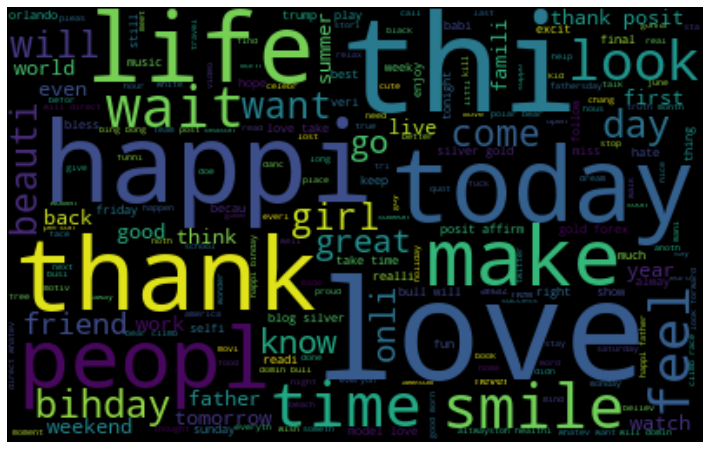

In [26]:
def hashtag_extract(b):
    hashtags = []
    for i in b:
        hashes = re.findall(r'#(\w+)', i)
        hashtags.append(hashes)
    return hashtags
#extracting labels
HT_regular = hashtag_extract(slt['tidy_tweet'][slt['label'] == 0])
HT_negative = hashtag_extract(slt['tidy_tweet'][slt['label'] == 1])
#counting sum
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

fd = nltk.FreqDist(HT_regular)
slt = pd.DataFrame({'Hash': list(fd.keys()),
                  'Value' : list(fd.values())})
slt = slt.nlargest(columns = 'Value', n = 100)
plt.figure(figsize = (20,5))
plot1 = sns.barplot(data =slt, x = 'Hash', y = 'Value',facecolor="Red")
plot1.set_xticklabels(list(fd.keys()), rotation=90)
plt.show()

In [33]:
sam_slt = slt[slt.label == 1]
sam_slt.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


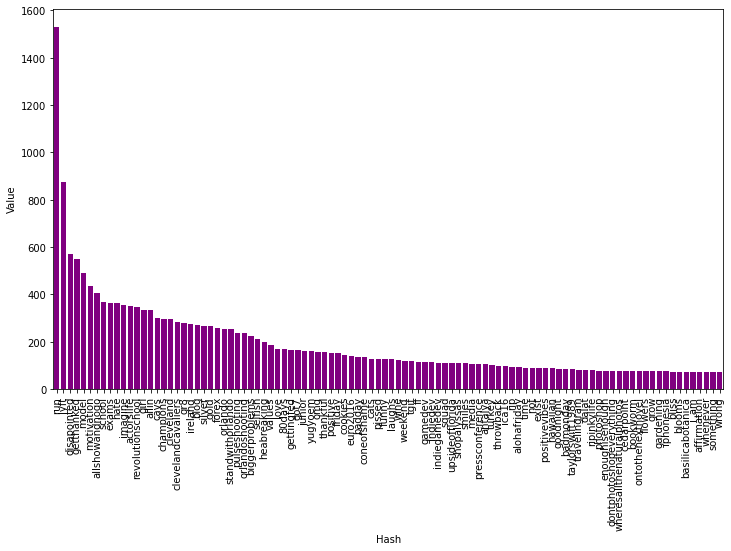

In [36]:
def hashtag_extract(b):
    hashtags = []
    for i in b:
        hashes = re.findall(r'#(\w+)', i)
        hashtags.append(hashes)
    return hashtags
#extracting labels
HT_regular = hashtag_extract(slt['tweet'][slt['label'] == 0])
HT_negative = hashtag_extract(slt['tweet'][slt['label'] == 1])
#counting sum
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

fd = nltk.FreqDist(HT_regular)
slt = pd.DataFrame({'Hash': list(fd.keys()),
                  'Value' : list(fd.values())})
slt = slt.nlargest(columns = 'Value', n = 100)
plt.figure(figsize = (12,7))
plot1 = sns.barplot(data =slt, x = 'Hash', y = 'Value',facecolor="Purple")
plot1.set_xticklabels(list(fd.keys()), rotation=90)
plt.show()

In [38]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [39]:
slt['processed_tweets'] = slt['tweet'].apply(process_tweet)
slt.head()

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


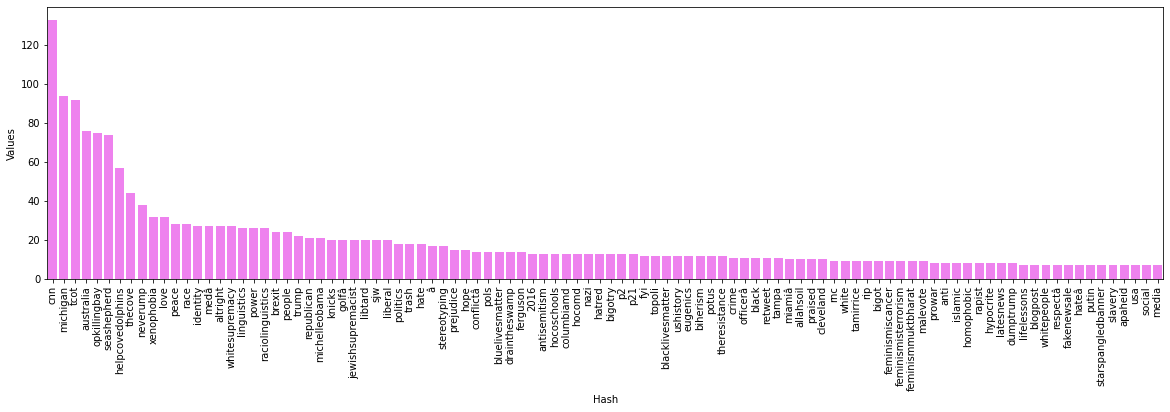

In [42]:
pt = nltk.FreqDist(HT_negative)
slt2 = pd.DataFrame({'Hash': list(pt.keys()),
                  'Values' : list(pt.values())})

slt2 = slt2.nlargest(columns = 'Values', n = 100)

plt.figure(figsize = (20,5))
plot2 = sns.barplot(data =slt2, x = 'Hash', y = 'Values',facecolor="violet")
plot2.set_xticklabels(list(pt.keys()), rotation=90)
plt.show()